# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
ps:you may want to toggle RTL layout if the arrangement of the cells is not well suited

## Introduction

 Movies dataset! I've selected a dataset about movies and their ratings,budgets,revenues... 

 When exploring this dataset a few questions comes to mind, for me they were:

1- Is there a relation between the popularity and vote_average ? 

2- How many movies are made in a year ?

3- Does the size of the revenue has anything to do with popularity ?

4- Is there a relation between the revenue and the runtime of the movie ?

5- Is the vote average depending on the runtime of the film ?

Let's start!

In [132]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In my case I don't need to change the format of any data type, not to mention dropping columns (in data cleaning) that I don't need.

In [133]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Dropping unwanted attributes, missing values
>  I'm simply dropping the attributes that are not needed in the analysis, then dropping observations with null values, respectively. Because some attributes have 1/10 non null values compared to the others, that's why I'm dropping the unwanted first.

In [134]:
def drop(arg):
    df.drop(columns=arg,inplace=True)
    # probably not the best case to use functions but I pretty much don't have a repetitive code.

drop(['homepage','tagline','keywords'])
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9771 non-null   int64  
 1   imdb_id               9771 non-null   object 
 2   popularity            9771 non-null   float64
 3   budget                9771 non-null   int64  
 4   revenue               9771 non-null   int64  
 5   original_title        9771 non-null   object 
 6   cast                  9771 non-null   object 
 7   director              9771 non-null   object 
 8   overview              9771 non-null   object 
 9   runtime               9771 non-null   int64  
 10  genres                9771 non-null   object 
 11  production_companies  9771 non-null   object 
 12  release_date          9771 non-null   object 
 13  vote_count            9771 non-null   int64  
 14  vote_average          9771 non-null   float64
 15  release_year        

<a id='eda'></a>
## Exploratory Data Analysis

Well, we have a few questions that we want to investigate:

1- Is there a relation between the popularity and vote_average ? 

2- How many movies are made in a year ?

3- Does the size of the revenue has anything to do with popularity ?

4- Is there a relation between the revenue and the runtime of the movie ?

5- Is the vote average depending on the runtime of the film ?

### Q1 Is there a relation between the popularity and vote_average ?

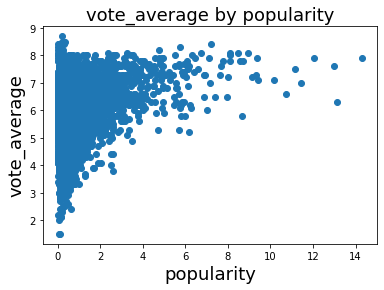

In [135]:
df_1 = df[df.popularity<20] # removing the outliers
plt.scatter(x=df_1.popularity,y=df_1.vote_average)
plt.title('vote_average by popularity',fontsize=18)
plt.xlabel('popularity',fontsize=18)
plt.ylabel('vote_average',fontsize=18);

The first line in the code removes three points (outliers), which were greater than 20, trying to make it a good visualization.

Amazing! so the popularity has no strong relation with the rating of the movie. 

### Q2 How many movies are made in a year ? 

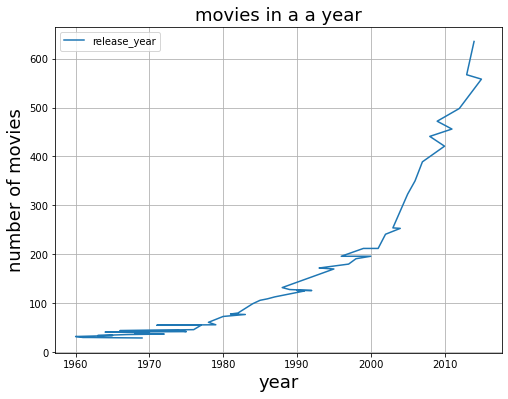

In [136]:
df['release_year'].value_counts().plot(kind='line',figsize=(8,6))
plt.title('movies in a a year',fontsize=18)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)
plt.legend()
plt.grid(True)

From the graph we conclude that lately, we're headed to making 700 films (approximately) in a year.

### Q3 Does the size of the revenue has anything to do with popularity ?

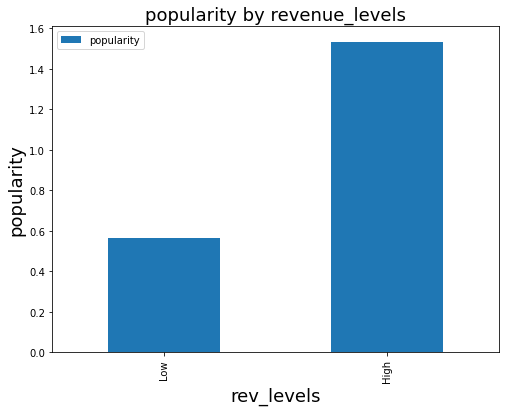

In [137]:
bins= [0,3.105254e+07,2.781506e+09]
bin_names = ['Low','High']
df['rev_levels'] = pd.cut(df['revenue'], bins, labels=bin_names)
df.groupby('rev_levels')['popularity'].mean().plot(kind='bar',figsize=(8,6))
plt.title('popularity by revenue_levels',fontsize=18)
plt.xlabel('rev_levels',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.legend();

obviously there is a strong relation between how much you **get** on a movie and the chanses it gets **popular**

### Q4 Is there a relation between the revenue and the runtime of the movie ?

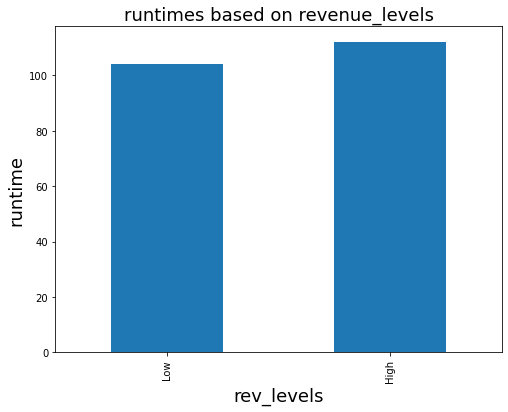

In [138]:
df.groupby('rev_levels')['runtime'].mean().plot(kind='bar',figsize=(8,6))
plt.title('runtimes based on revenue_levels',fontsize=18)
plt.xlabel('rev_levels',fontsize=18)
plt.ylabel('runtime',fontsize=18);


> clearly, there is no strong relation between the **revenue_levels (High,Low)** and the **runtime** of the movie

### Q5 Is the vote average depending on the runtime of the film ?

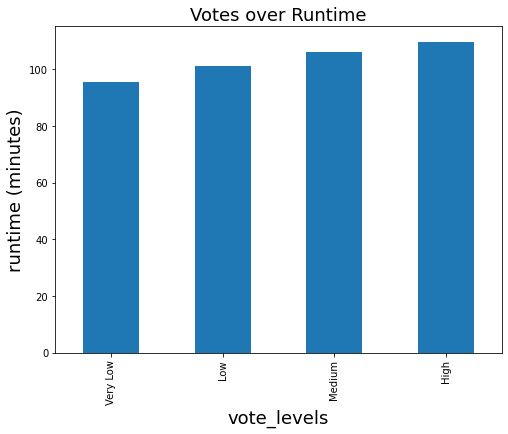

In [139]:
bins= [1.500000,5.400000,6.000000,6.600000,8.700000]
bin_names = ['Very Low','Low','Medium','High']
df['vote_levels'] = pd.cut(df['vote_average'], bins, labels=bin_names)
df.groupby('vote_levels')['runtime'].mean().plot(kind='bar',figsize=(8,6));

plt.title('Votes over Runtime',fontsize=18)
plt.xlabel('vote_levels',fontsize=18)
plt.ylabel('runtime (minutes)',fontsize=18);

> hmm... very interesting, as the **votes** goes up the **length** of the movie also increases

<a id='conclusions'></a>
## Conclusions

we answered the question we asked, probably not in the best way statistically, but we got an intuition of the answer. we faced some difficulty, one of them is trying to plot the budget attribute ,which is a bad idea because the scientific notation will give us zeros for some of the observations (since budget is represented with large values), also there was some missing values, which was a lot, probably this affect the analysis somehow, cause the sample dropped 1000 observation out of 10000.

Also there is no **unit** for popularity it's just numbers, I don't know what those numbers represent (I read about the dataset and this info wasn't there).


We can conclude the following:

1- **popularity** has no strong relation with the **rating** of the movie

2- number of movies made in a year are increasing yearly

3- there is a strong relation between how much you **get** on a movie and the chanses it gets **popular**

4- there is no strong relation between the **revenues** and the **runtime** of the movie

5- as the **votes** increase the **length** of the movie also increases